In [243]:
import pandas as pd
import glob
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore", category=FutureWarning)

files = glob.glob('./server_results/grid_search/*.csv')
files = glob.glob('./server_results/grid_search_ext/*.csv')

In [ ]:
def handle_matcher_names(df):



    # substitutions = {
    #     'header_values_default': 'H+V def.',
    #     'header_values_simple': 'H+V simp.',
    #     'header_values_verbose': 'H+V ver.',
    #     'header_values_repeat': 'H+V rep.',
    #     'header_values_prefix': 'H+V pref.',
    #     'header_only': 'V only',
    #     'header_values_verbose_notype': 'H+V ver. notyp',
    #     'header_values_columnvaluepair_notype': 'H+V col-val notyp',
    #     'header_header_values_repeat_notype': 'H+V rep. notyp',
    #     'header_values_default_notype': 'H+V def. notyp',
    # }

    substitutions = {
        'header_values_default': 'Default (Type)',
        'header_values_verbose': 'Verbose (Type)',
        'header_values_repeat': 'Repeat (Type)',
        'header_values_prefix': 'Prefix (Type)',
        'header_only': 'Column only',
        'header_values_verbose_notype': 'Verbose',
        'header_values_columnvaluepair_notype': 'ColVal Pairs',
        'header_header_values_repeat_notype': 'Repeat',
        'header_values_default_notype': 'Default',
    }

    df['encoding_mode'] = df['encoding_mode'].replace(substitutions)

    # print(df['encoding_mode'].unique())

    to_show = [
        #'Default (Type)',
        'Default',
        'Verbose',
        'Repeat',
        'ColVal Pairs',
        'Column only',
    ]

#     ['Default (Type)' 'Prefix (Type)' 'Repeat (Type)' 'Verbose (Type)'
#  'Column only' 'Verbose' 'ColVal Pairs' 'Repeat' 'Default']

    df = df[df['encoding_mode'].isin(to_show)].copy()


    
    
    df['sampling_mode'] = df['sampling_mode'].str.title()
    df['sampling_mode'] = df['sampling_mode'].str.replace('_Sampling', '')
    df = df[df['sampling_mode'] != 'Mixed'].copy()

    sampling_size = 10
    df = df[df['sampling_size'] == sampling_size].copy()

    df.rename(columns={'All_RecallAtSizeofGroundTruth': 'Recall@GT'}, inplace=True)
    df.rename(columns={'mrr': 'MRR'}, inplace=True)

    return df


def best_aggregate(df, metric='mrr'):

    df_grouped = df.groupby(['encoding_mode', 'sampling_mode', 'sampling_size'])[
        metric].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
    # df_grouped = df.groupby([ 'sampling_mode','encoding_mode', 'sampling_size'])[metric].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
    df_grouped = df_grouped.sort_values(by='mean', ascending=False)
    print(df_grouped.head(20).to_string())
    return df_grouped



def plot(df, ax, x, hue, group, y, datasetname, figsize=(15, 5), legend=False, save=None):
    

    order = df.groupby(x)[y].mean().sort_values(ascending=False).index

    hue_order = df.groupby(hue)[y].mean().sort_values(ascending=False).index

    sns.boxplot(
        data=df,
        x=x,
        hue=hue,
        y=y,
        ax=ax,
        palette=sns.color_palette("Set2"),  # Use a better palette
        order=order,
        hue_order=hue_order, showfliers=False

    )

    #ax.set_xlabel(x.replace('_', ' ').title(), fontsize=14)
    ax.set_xlabel('Column representation', fontsize=14)

    ax.set_ylabel(y.upper(), fontsize=14)

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    if legend:
        ax.set_xlabel('')

    if legend:
        ax.legend(
            title=hue.replace('_mode', '').title(),
            fontsize=14,
            title_fontsize=14,
            loc='lower center',
            bbox_to_anchor=(0.48, 0.98),
            ncol=len(df[hue].unique()),
            frameon=False
        )
    else:
        ax.get_legend().remove()

    sns.despine()



def plot_grouped_bar(df, x, hue, group, metrics, datasetname, figsize=(9, 8), save=None):

    fig, axis = plt.subplots(len(metrics),1 , figsize=figsize)

    for i, metric in enumerate(metrics):
        ax = axis[i]
        plot(df, ax, x, hue, group, metric, datasetname, figsize=figsize, legend=(i==0), save=None)


    if save is not None:
        fig.savefig(save, format='pdf', dpi=300)

    plt.tight_layout()
    plt.show()
   

In [245]:
metric1 = 'MRR'
metric2 = 'Recall@GT'
metrics = [metric1, metric2]

In [246]:
all_dfs_list = []
datasetnames = []
for file in files:
    datasetname = file.split('_')[0]
    datasetname = file.split('/')[-1].split('_')[0]
    datasetnames.append(datasetname)
    df = pd.read_csv(file)
    df = handle_matcher_names(df)
    
    all_dfs_list.append(df)

    if datasetname == 'GDC':
        gdc_df = df

all_dfs = pd.concat(all_dfs_list)



In [247]:
# gdc_df_filtered = gdc_df[gdc_df['target_table'] == 'Huang.csv']
# gdc_df_filtered = gdc_df_filtered.sort_values(by='mrr', ascending=False)


# columns_to_select = [
#      'ncols_tgt', 'nrows_src', 'nrows_tgt', 'nmatches',
#     'encoding_mode', 'sampling_mode', 'sampling_size', 'runtime', 'mrr',
#     'All_RecallAtSizeofGroundTruth'
# ]

# gdc_df_filtered_selected = gdc_df_filtered[columns_to_select]
# print(gdc_df_filtered_selected.head(20))

Results for GDC


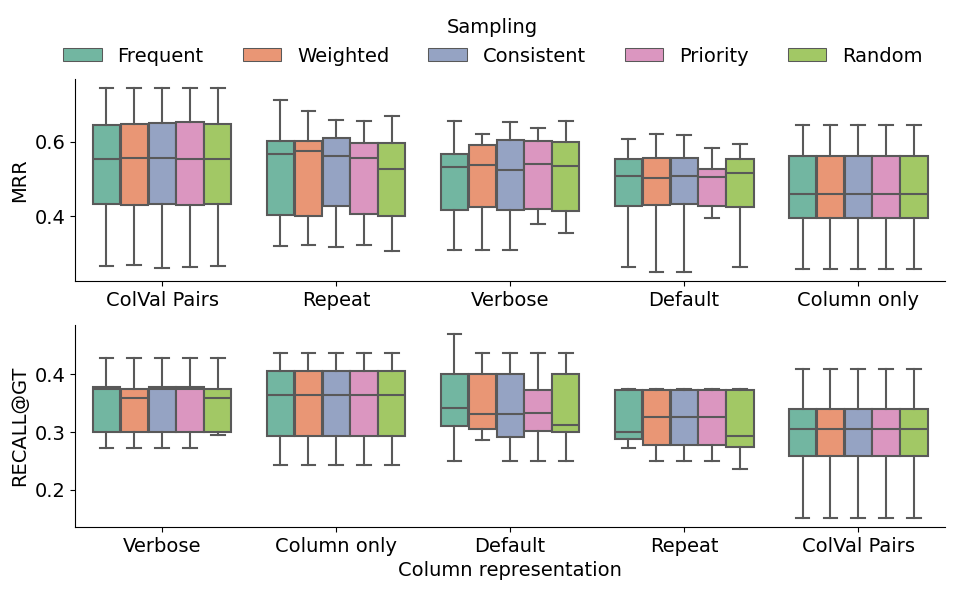

   encoding_mode sampling_mode  sampling_size      mean    median       min       max       std
4   ColVal Pairs      Weighted             30  0.526771  0.555703  0.266909  0.744391  0.162464
3   ColVal Pairs        Random             30  0.526745  0.553452  0.265129  0.744391  0.163329
1   ColVal Pairs      Frequent             30  0.525525  0.552147  0.266644  0.744391  0.161849
2   ColVal Pairs      Priority             30  0.524903  0.553225  0.261905  0.744391  0.165624
0   ColVal Pairs    Consistent             30  0.523061  0.554654  0.259826  0.744391  0.167157
22       Verbose      Priority             30  0.517038  0.539575  0.378736  0.637748  0.101604
16        Repeat      Frequent             30  0.516887  0.566555  0.320238  0.711058  0.129724
15        Repeat    Consistent             30  0.514405  0.561649  0.315790  0.659325  0.126022
19        Repeat      Weighted             30  0.513559  0.574807  0.320614  0.682496  0.127025
23       Verbose        Random          

In [248]:
for i,df in enumerate(all_dfs_list):
    datasetname =datasetnames[i]
    if datasetname != 'GDC':
        continue
    print('Results for', datasetname)
    plot_grouped_bar(df,  'encoding_mode', 'sampling_mode','sampling_size', metrics,datasetname, figsize=(10, 6), save = "figures/grid_search_retriever_encmodes.pdf")
    best_aggregate(df, metric1)

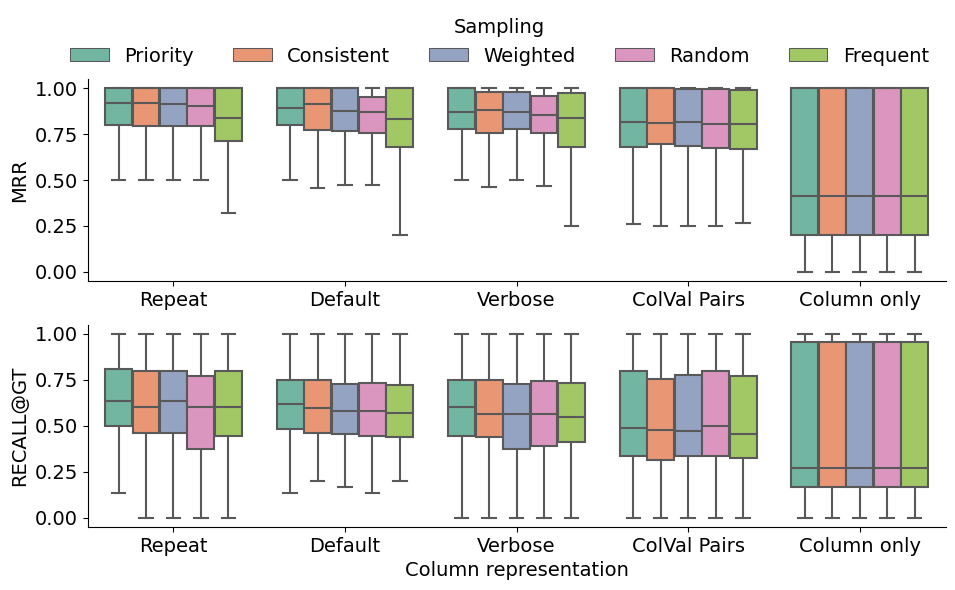

   encoding_mode sampling_mode  sampling_size      mean    median       min  max       std
17        Repeat      Priority             30  0.865282  0.916667  0.322789  1.0  0.159767
15        Repeat    Consistent             30  0.865198  0.916667  0.315790  1.0  0.156912
18        Repeat        Random             30  0.859383  0.901824  0.306228  1.0  0.157253
19        Repeat      Weighted             30  0.857189  0.910550  0.320614  1.0  0.161333
10       Default    Consistent             30  0.842563  0.912879  0.200000  1.0  0.182129
12       Default      Priority             30  0.842029  0.888889  0.200000  1.0  0.175531
22       Verbose      Priority             30  0.839681  0.871765  0.250000  1.0  0.165169
24       Verbose      Weighted             30  0.837269  0.869318  0.200000  1.0  0.164283
20       Verbose    Consistent             30  0.836058  0.878529  0.200000  1.0  0.171961
14       Default      Weighted             30  0.834020  0.872024  0.166667  1.0  0.181050

In [249]:

plot_grouped_bar(all_dfs,  'encoding_mode', 'sampling_mode','sampling_size', metrics, 'All datasets', figsize=(10, 6), save = "figures/grid_search_retriever_encmodes.pdf")
best_aggregate(all_dfs, metric1)

all_dfs.to_csv('all_dfs_export.csv', index=False)